## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools

train, test = keras.datasets.cifar10.load_data()

## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

Using TensorFlow backend.


In [2]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

## 1.試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異

In [3]:
from keras.layers import Input, Dense, BatchNormalization, Activation
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128, 32]):    
    """
    Build your own model
    """
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [4]:
## 超參數設定
"""
Set your hyper-parameters
"""
epochs = 50
batch_size = [32, 128, 256]

In [5]:
results = {}
"""
Write your training loop and record results
"""
for bs in batch_size:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f'batch_size = {bs}')
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=0.01, nesterov=True, momentum=0.9)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, epochs=epochs, batch_size=bs, validation_data=(x_test, y_test), shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    name_tag = f'batch_size = {bs}'
    results[name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 
                         'train-acc': train_acc, 'valid-acc': valid_acc}

batch_size = 32
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128      
______________________________________________________

50000/50000 [==============================] - 26s 519us/step - loss: 1.1167 - acc: 0.6024 - val_loss: 1.4164 - val_acc: 0.5098
Epoch 46/50
50000/50000 [==============================] - 25s 509us/step - loss: 1.1130 - acc: 0.6023 - val_loss: 1.4409 - val_acc: 0.5006
Epoch 47/50
50000/50000 [==============================] - 25s 501us/step - loss: 1.1076 - acc: 0.6074 - val_loss: 1.4313 - val_acc: 0.5057ss: 1.10 - ETA: 1s - - ETA: 0s - loss: 1.1079 - acc: 0.
Epoch 48/50
50000/50000 [==============================] - 25s 501us/step - loss: 1.1085 - acc: 0.6072 - val_loss: 1.3997 - val_acc: 0.5089
Epoch 49/50
50000/50000 [==============================] - 25s 508us/step - loss: 1.1077 - acc: 0.6013 - val_loss: 1.4546 - val_acc: 0.4982
Epoch 50/50
50000/50000 [==============================] - 26s 514us/step - loss: 1.0949 - acc: 0.6069 - val_loss: 1.4421 - val_acc: 0.5044
batch_size = 128
_________________________________________________________________
Layer (type)                 Outpu

Epoch 43/50
50000/50000 [==============================] - 10s 205us/step - loss: 0.8217 - acc: 0.7030 - val_loss: 1.6468 - val_acc: 0.4856
Epoch 44/50
50000/50000 [==============================] - 9s 187us/step - loss: 0.8194 - acc: 0.7051 - val_loss: 1.6880 - val_acc: 0.4898
Epoch 45/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.8117 - acc: 0.7057 - val_loss: 1.7622 - val_acc: 0.4820
Epoch 46/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.7939 - acc: 0.7103 - val_loss: 1.8307 - val_acc: 0.4484
Epoch 47/50
50000/50000 [==============================] - 9s 175us/step - loss: 0.7881 - acc: 0.7131 - val_loss: 1.9101 - val_acc: 0.4692
Epoch 48/50
50000/50000 [==============================] - 9s 176us/step - loss: 0.7785 - acc: 0.7192 - val_loss: 1.7701 - val_acc: 0.4771
Epoch 49/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.7713 - acc: 0.7201 - val_loss: 2.1095 - val_acc: 0.4259
Epoch 50/50
50000/50000 [

50000/50000 [==============================] - 8s 164us/step - loss: 0.6938 - acc: 0.7511 - val_loss: 2.2036 - val_acc: 0.4432
Epoch 42/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.6676 - acc: 0.7606 - val_loss: 2.0978 - val_acc: 0.4593
Epoch 43/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.6616 - acc: 0.7615 - val_loss: 2.1012 - val_acc: 0.4390
Epoch 44/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.6432 - acc: 0.7694 - val_loss: 2.0129 - val_acc: 0.4658
Epoch 45/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.6387 - acc: 0.7688 - val_loss: 2.3198 - val_acc: 0.4169
Epoch 46/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.6284 - acc: 0.7729 - val_loss: 2.2760 - val_acc: 0.4177
Epoch 47/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.6132 - acc: 0.7795 - val_loss: 2.0677 - val_acc: 0.4513
Epoch 48/50
50000/50000 [==============

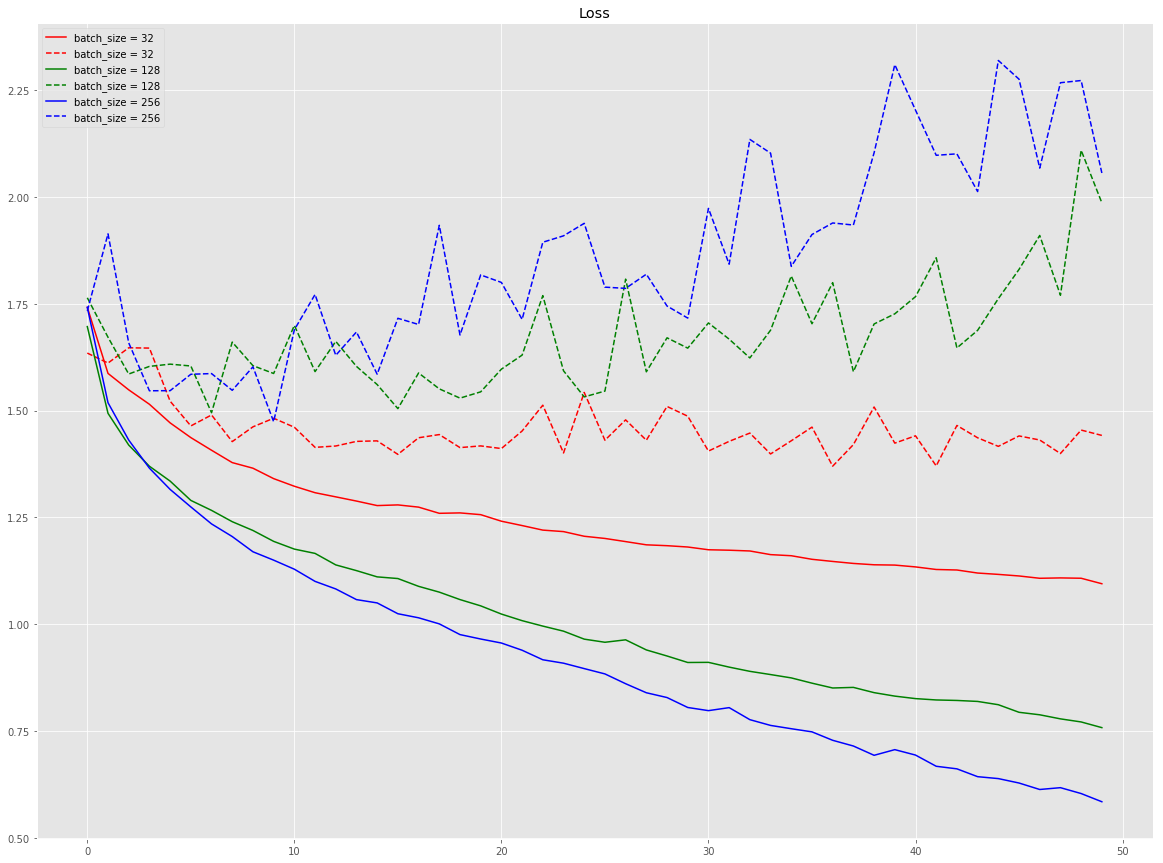

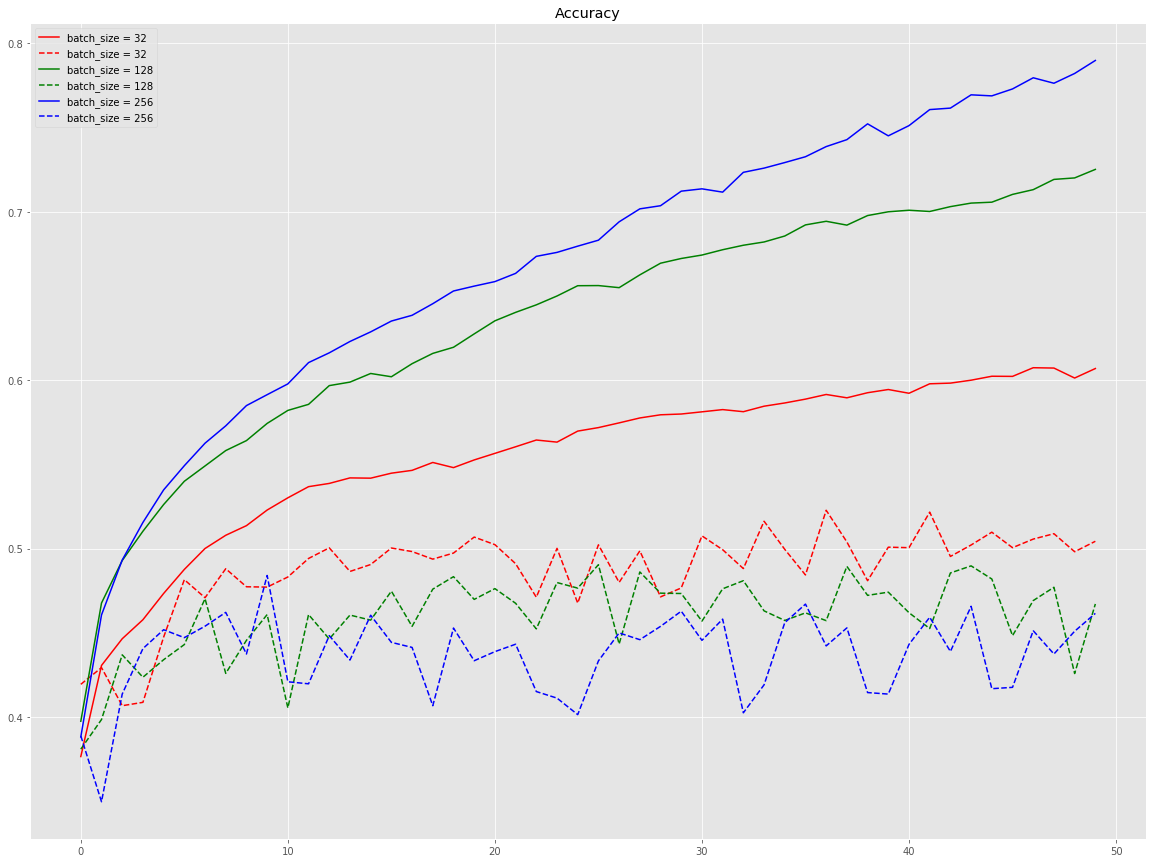

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
Plot results
"""
plt.style.use('ggplot')
color_bar = ['r', 'g', 'b']

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 2.請嘗試將 BN 放在 Activation 之前，並比較訓練結果

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128, 32]):    
    """
    Build your own model
    """
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
        else:
            x = Dense(units=n_units, name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
    
    out = Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
## 超參數設定
"""
Set your hyper-parameters
"""
epochs = 50
batch_size = [128, 256]

In [11]:
results = {}
"""
Write your training loop and record results
"""
for bs in batch_size:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f'batch_size = {bs}')
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=0.01, nesterov=True, momentum=0.9)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, epochs=epochs, batch_size=bs, validation_data=(x_test, y_test), shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    name_tag = f'batch_size = {bs}'
    results[name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 
                         'train-acc': train_acc, 'valid-acc': valid_acc}

batch_size = 128
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0   

50000/50000 [==============================] - 8s 160us/step - loss: 0.1258 - acc: 0.9567 - val_loss: 3.4235 - val_acc: 0.4790
Epoch 47/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.1214 - acc: 0.9575 - val_loss: 2.9844 - val_acc: 0.4892
Epoch 48/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.1185 - acc: 0.9596 - val_loss: 3.4909 - val_acc: 0.4498
Epoch 49/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.1201 - acc: 0.9580 - val_loss: 4.0995 - val_acc: 0.4176
Epoch 50/50
50000/50000 [==============================] - 8s 156us/step - loss: 0.1174 - acc: 0.9578 - val_loss: 3.6726 - val_acc: 0.4764
batch_size = 256
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 

Epoch 42/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.1011 - acc: 0.9660 - val_loss: 3.2112 - val_acc: 0.4670
Epoch 43/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.1043 - acc: 0.9652 - val_loss: 3.5337 - val_acc: 0.4629
Epoch 44/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.0965 - acc: 0.9681 - val_loss: 3.7758 - val_acc: 0.4411
Epoch 45/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.0940 - acc: 0.9682 - val_loss: 3.6093 - val_acc: 0.4541s:
Epoch 46/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.1011 - acc: 0.9658 - val_loss: 3.7126 - val_acc: 0.4614
Epoch 47/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.1043 - acc: 0.9652 - val_loss: 3.4855 - val_acc: 0.4562
Epoch 48/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.0784 - acc: 0.9741 - val_loss: 3.5385 - val_acc: 0.4693
Epoch 49/50
50000/50000 [

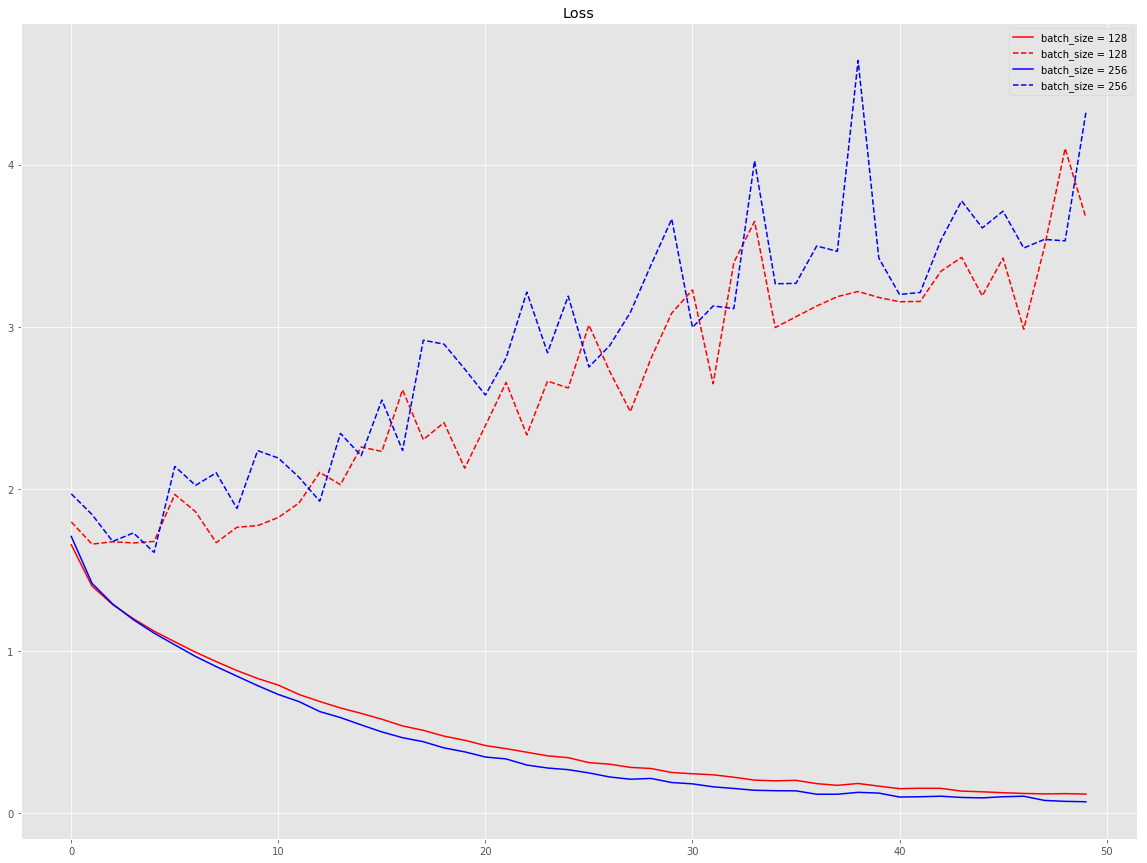

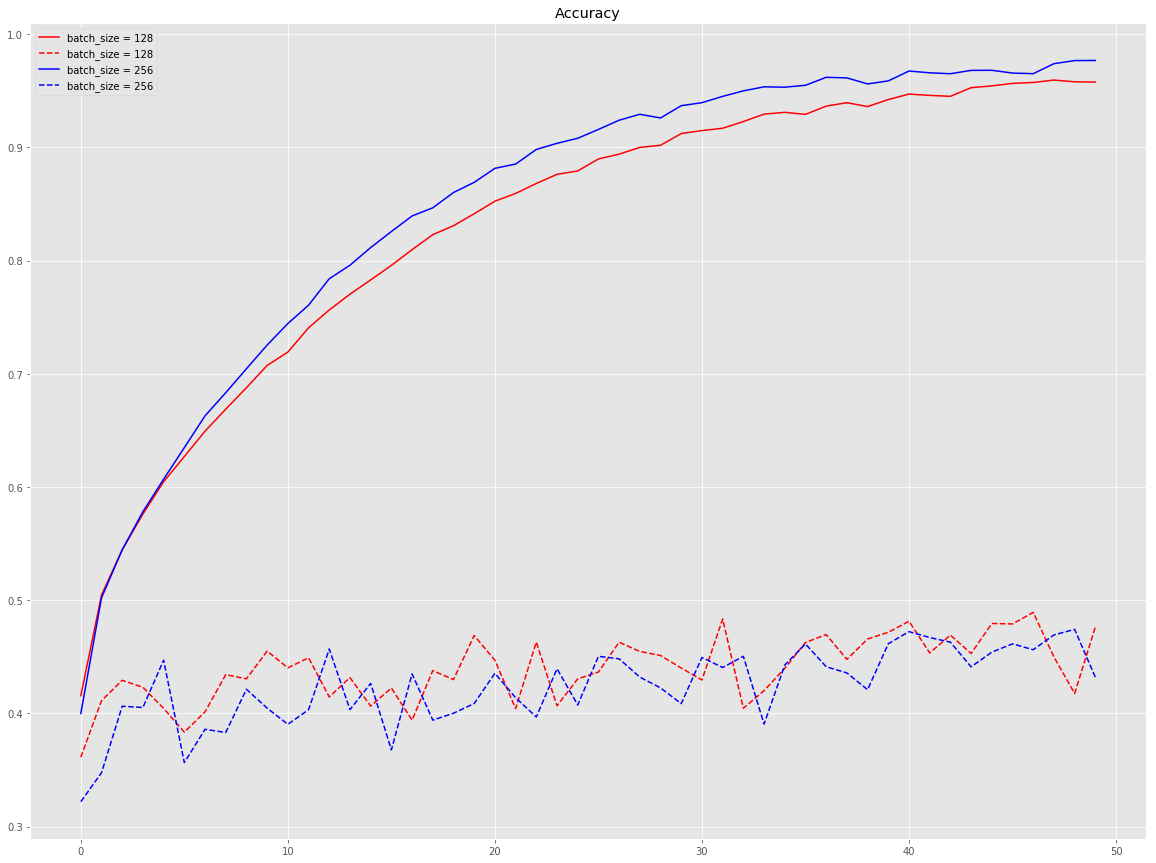

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
Plot results
"""
plt.style.use('ggplot')
color_bar = ['r', 'b']

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 3.請於 BN 放在 Input Layer 後，並比較結果

In [16]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128, 32]):    
    """
    Build your own model
    """
    input_layer = Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
        else:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
## 超參數設定
"""
Set your hyper-parameters
"""
epochs = 50
batch_size = [128, 256]

In [18]:
results = {}
"""
Write your training loop and record results
"""
for bs in batch_size:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f'batch_size = {bs}')
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=0.01, nesterov=True, momentum=0.9)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, epochs=epochs, batch_size=bs, validation_data=(x_test, y_test), shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    name_tag = f'batch_size = {bs}'
    results[name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 
                         'train-acc': train_acc, 'valid-acc': valid_acc}

batch_size = 128
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 1,655,786
Trainable params: 1,649,642
Non-trainable params: 6,144
_____________________________________________

batch_size = 256
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 1,655,786
Trainable params: 1,649,642
Non-trainable params: 6,144
_____________________________________________

50000/50000 [==============================] - 6s 120us/step - loss: 0.1029 - acc: 0.9653 - val_loss: 3.3836 - val_acc: 0.5238


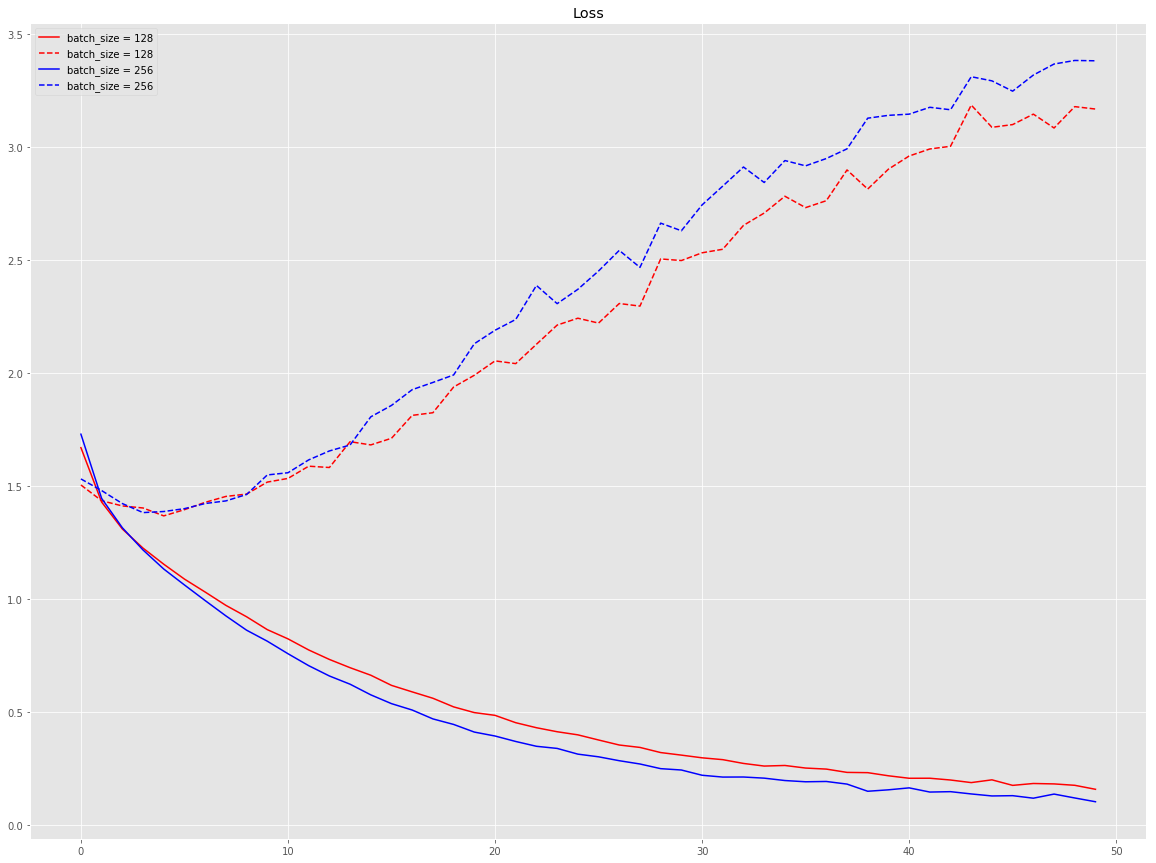

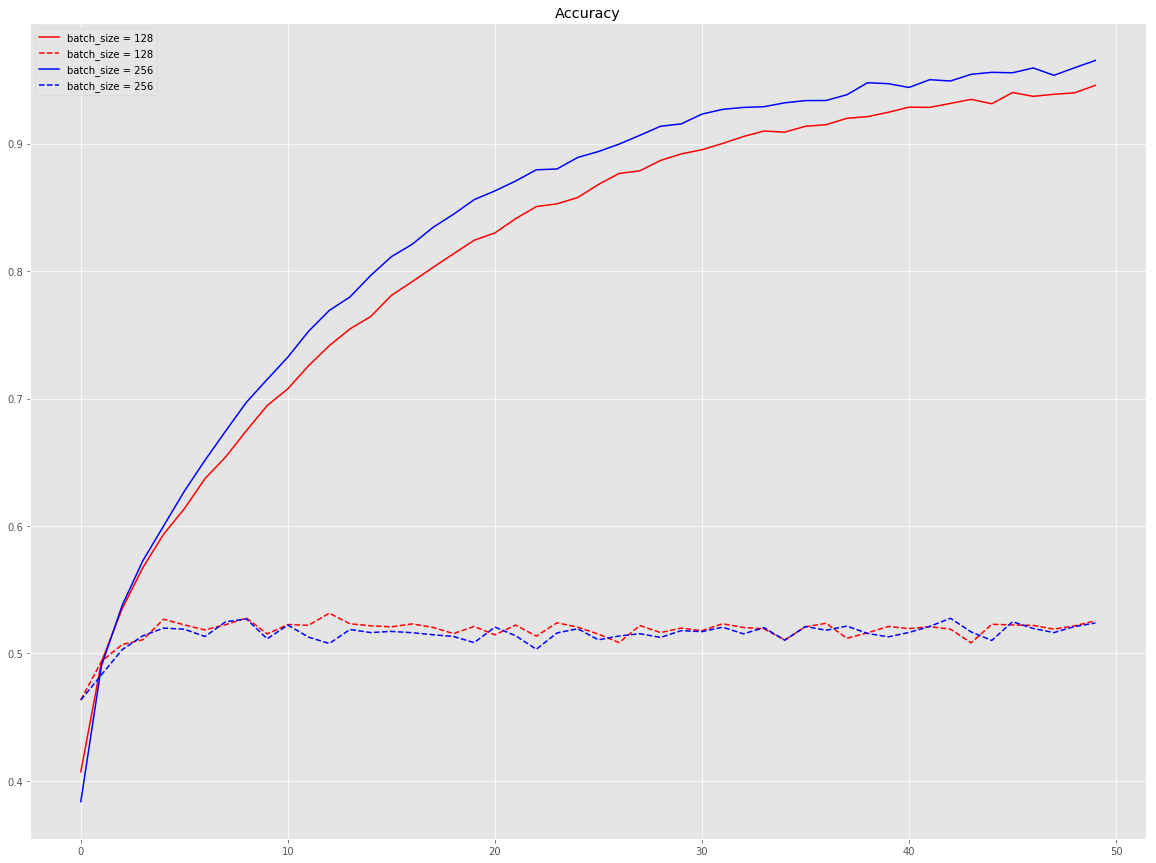

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
Plot results
"""
plt.style.use('ggplot')
color_bar = ['r', 'b']

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()